Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Inicializaciones

In [2]:
#Dimensiones de la imagen a crear
ancho = 200
alto = 300

TAREA: Crea una imagen, p.e. 800x800, con la textura del tablero de ajedrez

(800, 800, 1)


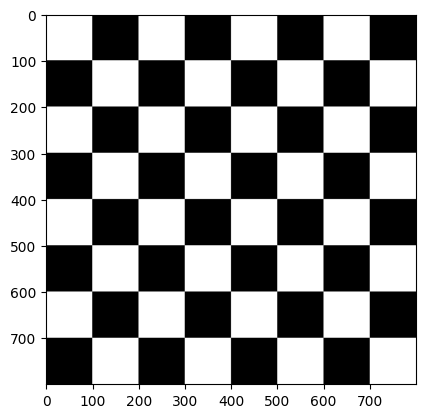

In [2]:
#Creaa una imagen con tres planos
tablero_ajedrez = np.zeros((800,800,1), dtype = np.uint8)
#Dimensiones
 
for i in range(0, 800, 100):
    for j in range(0, 800, 100):
        if (i % 200 == 0 and j % 200 == 0) or (i % 200 != 0 and j % 200 != 0):
            tablero_ajedrez[i:i+100, j:j+100, 0] = 255

        
    #gris_img[0:20,0:20,0] = 255 #Especifica el canal 0
print(tablero_ajedrez.shape)
#Visualiza sin especificar el mapa de color gris
plt.imshow(tablero_ajedrez, cmap='gray') 
plt.show()

TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ )

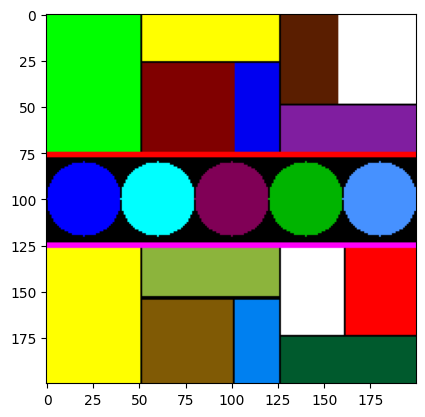

True

In [107]:
#Crea una imagen con tres planos
color_img = np.zeros((200,200,3), dtype = np.uint8)



# Primera fila
cv2.rectangle(color_img,(0,0),(50,75),(0,255,0),-2)
cv2.rectangle(color_img,(52,0),(125,25),(255,255,0),-1)
cv2.rectangle(color_img,(52,27),(102,75),(128,0,0),-2)
cv2.rectangle(color_img,(102,27),(125,75),(0,0,240),-2)
cv2.rectangle(color_img,(127,50),(200,75),(128,30,160),-2)
cv2.rectangle(color_img,(127,50),(200,75),(128,30,160),-2)
cv2.rectangle(color_img,(127,0),(157,48),(90,30,0),-2)
cv2.rectangle(color_img,(158,0),(200,48),(255,255,255),-2)
cv2.rectangle(color_img,(127,50),(200,75),(128,30,160),-2)


cv2.line(color_img,(0,76),(200,76),(255,0,0),2)

# Segunda fila
cv2.circle(color_img,(20,100), 20, (0,0,255), -1)
cv2.circle(color_img,(60,100), 20, (0,255,255), -1)
cv2.circle(color_img,(100,100), 20, (128,0,86), -1)
cv2.circle(color_img,(140,100), 20, (0,180,0), -1)
cv2.circle(color_img,(180,100), 20, (70,145,255), -1)

cv2.line(color_img,(0,125),(200,125),(255,0,250),2)

# Tercera fila
cv2.rectangle(color_img,(0,127),(50,200),(255,255,0),-2)
cv2.rectangle(color_img,(52,127),(125,152),(140,180,60),-1)
cv2.rectangle(color_img,(52,155),(100,200),(128,90,5),-2)
cv2.rectangle(color_img,(102,155),(125,200),(0,128,240),-2)
cv2.rectangle(color_img,(127,175),(200,200),(0,90,45),-2)
cv2.rectangle(color_img,(127,127),(160,173),(255,255,255),-2)
cv2.rectangle(color_img,(162,127),(200,173),(255,0,0),-2)


# #Visualiza sin especificar el mapa de color gris
plt.imshow(color_img) 
plt.show()


#Salva la imagen resultante a disco
cv2.imwrite('imagen.jpg', color_img)

TAREA: Modifica de alguna forma los valores de un plano de la imagen

In [23]:
# SOLUCION

import cv2
import numpy as np

vid = cv2.VideoCapture(0)
  
while True:      
    ret, frame = vid.read()

    if ret:
        # Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]
        # Dimensiones
        h, w, c = frame.shape

        # Modificamos el plano verde (canal G)
        # Por ejemplo, aumentamos en 50 el valor de todos los píxeles verdes
        g = np.clip(g + 50, 0, 255)  # Asegura que los valores estén en el rango [0, 255]

        # Concatenamos en horizontal los tres planos del fotograma
        collage = np.hstack((r, g, b))
    
        # Muestra el fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('Cam3', cv2.resize(collage, (int(w*2.5), int(h)), cv2.INTER_NEAREST))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()


Evento de ratón para mostrar el valor RGB del píxel

In [3]:
# Función que trata eventos de ratón 
def mouse_events(event, x, y, flags, params):
    global px, py, R, G, B
    px = -1
    # Movimiento del puntero     
    if event==cv2.EVENT_MOUSEMOVE:
        #Valores del píxel
        B = frame[y, x, 0]
        G = frame[y, x, 1]
        R = frame[y, x, 2]  

        px = x
        py = y

     
  

In [20]:
vid = cv2.VideoCapture(0)

# Tipografía para mostrar texto
font = cv2.FONT_HERSHEY_SIMPLEX
  
lanzado = 0
px = -1
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret: 
        # Activa em manejador en el primer fotograma
        if lanzado == 0:
            # Muestra fotograma
            cv2.imshow('Cam', frame)   
            # Define el nombre del manejador del evento
            cv2.setMouseCallback('Cam', mouse_events)
            lanzado = 1
            
        # Muestra valores RGB intentando centrar en el puntero
        if px > -1:
            cv2.putText(frame, '{}'.format(R), (px-45,py-5), font, 0.5, (0, 0, 255), 1)
            cv2.putText(frame, '     {}'.format(G), (px-54,py-5), font, 0.5, (0, 255, 0), 1)
            cv2.putText(frame, '         {}'.format(B), (px-54,py-5), font, 0.5, (255, 0, 0), 1)
            
        cv2.imshow('Cam', frame)   
        
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [1]:
#SOLUCION TAREA:
import cv2
import numpy as np

# Función para manejar eventos del ratón
def mouse_events(event, x, y, flags, params):
    global px, py, R, G, B
    px = -1
    # Movimiento del puntero     
    if event==cv2.EVENT_MOUSEMOVE:
        #Valores del píxel
        B = frame[y, x, 0]
        G = frame[y, x, 1]
        R = frame[y, x, 2]  

        px = x
        py = y


# Inicializa la captura de video desde la cámara
vid = cv2.VideoCapture(0)

# Tipografía para mostrar texto
font = cv2.FONT_HERSHEY_SIMPLEX

lanzado = 0
px, py = -1, -1

while True:
    # Captura fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Activa el manejador en el primer fotograma
        if lanzado == 0:
            # Muestra el fotograma
            cv2.imshow('Cam', frame)
            # Define el nombre del manejador del evento
            cv2.setMouseCallback('Cam', mouse_events)
            lanzado = 1

        # Encuentra los valores mínimo y máximo de intensidad
        min_intensity = np.min(frame)
        max_intensity = np.max(frame)

        # Encuentra las coordenadas de los píxeles más claros y oscuros
        min_coords = np.argwhere(frame == min_intensity)
        max_coords = np.argwhere(frame == max_intensity)

        # Dibuja círculos en los píxeles más claros y oscuros
        for coord in min_coords:
            cv2.circle(frame, (coord[1], coord[0]), 5, (0, 0, 255), -1)  # Rojo para píxeles oscuros
        for coord in max_coords:
            cv2.circle(frame, (coord[1], coord[0]), 5, (0, 255, 0), -1)  # Verde para píxeles claros

        cv2.imshow('Cam', frame)

    # Detén el bucle al pulsar la tecla ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()


Pop art
Salida de la webcam "inspirada" en Andy Warhol

In [14]:
vid = cv2.VideoCapture(0)

#Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Fuerzo a mitad de resolución para ocupar menos pantalla
w=int(w/2)
h=int(h/2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w) #En Mac no reacciona a estos comandos
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

#Imagen conjunta 2x original
collage = np.zeros((h*2,w*2,3), dtype = np.uint8)
tl = collage[0:h,0:w]
tr = collage[0:h,w:w+w]
bl = collage[h:h+h,0:w]
br = collage[h:h+h,w:w+w]

while True:      
    # fotograma a fotograma
    ret, frameIN = vid.read()

    #Menor tamaño
    frame = cv2.resize(frameIN, (int(w),int(h)),cv2.INTER_NEAREST)

    if ret:
        #Separamos canales
        r = frame[:,:,2]
        g = frame[:,:,1]
        b = frame[:,:,0]

        #Jugamos
        tl[:,:,0] = b
        tl[:,:,1] = g
        tl[:,:,2] = r

        tr[:,:,0] = 255 - r
        tr[:,:,1] = g
        tr[:,:,2] = b
        
        bl[:,:,0] = r
        bl[:,:,1] = 255 - b
        bl[:,:,2] = g

        br[:,:,0] = b
        br[:,:,1] = g
        br[:,:,2] = 255 - r
    
        # Muestra composicion
        cv2.imshow('Cam', collage)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

Transformando la imagen capturada en una colección de círculos, cuyo radio depende de la intensidad promedio de la zona

In [4]:
vid = cv2.VideoCapture(0)

ncells = 8
off = int(ncells/2)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Dimensiones originales
        h, w, c = frame.shape
        #Redimensiono
        down_frame = cv2.resize(frame, (int(w/ncells),int(h/ncells)),cv2.INTER_NEAREST)
        #Dimensiones reducidas
        h2, w2, c2 = down_frame.shape

        #Separamos canales
        r = down_frame[:,:,0]
        g = down_frame[:,:,1]
        b = down_frame[:,:,2]

        # Creamos imagen negra
        gris_up_frame = np.zeros((h2*ncells,w2*ncells,1), dtype = np.uint8)

        for y in range(0,h2):
            for x in range(0,w2):
                # La suma de los valores RGB define el radio del círculo
                rad = int ( (r[y,x] + g[y,x] + b[y,x])/(ncells*3*2))
                cv2.circle(gris_up_frame,(x*ncells+off, y*ncells + off), rad, (255,255,255), -1)

    
        # Muestra fotograma resultante
        cv2.imshow('Cam', gris_up_frame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

C:\Users\emili\AppData\Local\Temp\ipykernel_7972\858119115.py:29: RuntimeWarning: overflow encountered in scalar add
  rad = int ( (r[y,x] + g[y,x] + b[y,x])/(ncells*3*2))


TAREA: Haz tu propuesta pop art